# Trabajo Práctico 1 - Matrices de Insumo Producto

## Enunciado

In [1]:
import numpy as np
import scipy.linalg
import pandas as pd
import matplotlib.pyplot as plt

### Consigna 1 -

Analizar qué sucede con la solución del sistema $p = (I − A)^{−1} d = Ld$ en cada uno de los siguientes casos:

a) $(I-A)$ es inversible

b) $(I-A)$ es inversible y $d$ = 0

c) $(I-A)$ no es inversible

d) $(I-A)$ no es inversible y $d$ = 0

Recordamos:
- p = es la producción total
- L (matriz de Leontief) = representa las relaciones entre sectores dentro de una economía, mostrando cómo los sectores dependen uno de los otros para la producción.
- d = representa la demanda externa


**(a) $(I - A)$ es inversible**

Si la matriz (I - A) es inversible, conseguimos la matriz L (matriz de Leontief), y la solución del sistema va a ser única. Se trata de una economía abierta, hay producción destinada a sectores de demanda externa.

**(b) $(I - A)$ es inversible y $d = 0$**

No hay demanda externa, por lo que la producción, en base a la ecuación, en principio es 0. Pero la solución de la ecuación no refleja la producción real, porque se trata de una economía cerrada. Esto quiere decir que toda la producción está destinada a los sectores de la demanda interna.

**(c) $(I - A)$ no es inversible**

Interpretamos que o bien no se puede resolver el sistema (entonces no existe solución y no hay ningún p que satisfaga la demanda d), o bien no hay solución única y en lugar de un único vector p, podrían existir infinitas soluciones. Como la ecuación que estamos analizando tiene la inversa de I - A, al ser I - A no inversible, este cálculo no se podría realizar, por lo que entendemos que no se puede resolver el sistema.

**(d) $(I - A)$ no es inversible y $d = 0$**

En comparación con el item (c), vemos que d = 0, por lo que esto nos estaría indicando que la multiplicación $(I − A)^{-1} * d$ da igual al vector nulo (incluso teniendo en cuenta que no podemos realizar el cálculo de la inversa de I - A). En este caso hay infinitas soluciones.

### Consigna 2

Implementar el cálculo de la inversa de la matriz (I−A) aplicando LU. Para ello completar el código de la función calcularLU que se encuentra en el archivo funciones.py del template del TP. Esta función debe devolver las matrices L y U. Luego, completar el código de la otra función inversaLU(L U) que devuelve la inversa final a través de las matrices L U devueltas por la anterior función. Para resolver sistemas, únicamente podrá utilizarse la función scipy.linalg.solve triangular de la biblioteca scipy.linalg que resuelve sistemas triangulares.

In [6]:
from funciones import calcularLU
from funciones import inversaLU

### Consigna 3 -

Resolver el sistema $p = (I − A)^{−1} d = Ld$ utilizando inversaLU para los siguientes valores de $A$ y $d$:

\begin{equation}
A =
    \begin{pmatrix}
        0,3 & 0,0 & 0,1\\
        0,05 & 1,0 & 0,2\\
        0,1 & 0,15 & 0,1
    \end{pmatrix}
\end{equation}

\begin{equation}
d =
    \begin{pmatrix}
        100\\
        100\\
        300
    \end{pmatrix}
\end{equation}

In [9]:
A = np.array([[0.3,0.0,0.1],[0.05,1.0,0.2],[0.1,0.15,0.1]])
d = np.array([[100],[100],[300]])
I = np.eye(3)
B = I-A

In [11]:
L, U, P = calcularLU(B)
Leo = inversaLU(L, U, P)

p = Leo@d
print(p)

[[   68.96551724]
 [-5149.42528736]
 [ -517.24137931]]


* ¿Hay una justificación económica de los valores encontrados para $p$?
* ¿Cuál es la característica de la matriz que lleva a esta solución?

Intuitivamente, entendemos que no tiene sentido que la producción de negativa.

Como hay un uno en la posicion 22 de la matriz (fila 2, columna 2), sabemos que se necesita 100% del producto 2 para producir este mismo. Es por esto que cuando hacemos la matriz B (I - A), en la posición 22 vemos que hay un 0. Para la posición 32, vemos que hay un valor negativo, y creemos que esto se debe a que ya estamos utilizando todo el producto 2 disponible, por lo que en principio no habría producto para producir este tercero.

Consideramos que esta es la característica por la cual obtenemos resultados negativos al resolver el sistema.


### Consigna 4 -

Analizar analíticamente qué sucede con la producción total cuando a partir de una demanda externa $d$, la demanda externa para el producto 3 cambia en un $\Delta d$. La demanda externa se convierte en

\begin{equation}
d' = d +
    \begin{pmatrix}
        0\\
        0\\
        1
    \end{pmatrix}
\end{equation}

Obtener la expresión del vector $\Delta p$ correspondiente a este ejemplo.

## Coeficientes técnicos

Las matrices $A$ con las que estuvimos trabajando tienen la característica de que son coeficientes técnicos que muestran la relación del flujo de los insumos y los productos. En la práctica, los valores de producción, insumos y los flujos relacionados, compras y ventas pensados en un período de tiempo (por ejemplo un año), están dados en unidades monetarias.

Por ejemplo, un Sector 4 que produce un total de producto equivalente a $15.000$, emplea $300$ de bienes del Sector 1: $z_{14}$ = 300 y $p_{4}$ = 15,000. En este caso $a_{14} = z_{14}/p_{4}$ = 300/15,000 = 0,02. Estos coeficientes técnicos se consideran fijos en el sentido de ser una medida de interrelación entre las salidas del sector y las entradas.

De forma matricial, teniendo $n$ Sectores, podemos definir

\begin{equation}
P =
\begin{pmatrix}
p_1 &\cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & p_n
\end{pmatrix}
\end{equation}

Luego, la matriz $A = ZP{^{-1}}$

Por la consigna tenemos que la nueva demanda (d') se calcula como:

\begin{equation}
d' = d + \Delta d = d + (0,0,1)^t
\end{equation}

Entonces:

\begin{equation}
p' = (I - A)^{-1}d' = (I - A)^{-1}(d + \Delta d) = (I - A)^{-1}d + (I - A)^{-1}\Delta d
\end{equation}
\begin{equation}
p' = p + \Delta p
\end{equation}
\begin{equation}
p + \Delta p = (I - A)^{-1}d + (I - A)^{-1}\Delta d
\end{equation}
\begin{equation}
p = (I - A)^{-1}d
\end{equation}

Luego, sabemos por la ecuación (2):

\begin{equation}
\Delta p = (I - A)^{-1}\Delta d.
\end{equation}
\begin{equation}
\Delta p = (I - A)^{-1} (0,0,1)^t.
\end{equation}

Sabiendo que $(I - A)^{-1}$ es la matriz de Leontief.

In [16]:
d_prima = np.array([[100], [100], [301]]) # d + delta_d
p_prima = Leo@d_prima
print(p_prima)

[[   68.96551724]
 [-5156.09195402]
 [ -517.24137931]]


In [18]:
delta_p = p_prima - p
print(delta_p)

# delta_p es la expresión de la variación de p.

[[ 0.        ]
 [-6.66666667]
 [ 0.        ]]


In [20]:
print(Leo)
print(p)

[[  1.37931034  -0.68965517   0.        ]
 [ -2.98850575 -28.50574713  -6.66666667]
 [ -0.34482759  -4.82758621   0.        ]]
[[   68.96551724]
 [-5149.42528736]
 [ -517.24137931]]


Observamos que el vector de producción cambia en el segundo valor. Le restamos a la producción, la tercera columna de la matriz de Leontief (que vendría a ser nuestro delta p). Esto interpretamos que tiene que ver con que se trata de combinaciones lineales de las columnas. Tiene sentido que se le haya restado la tercer columna, porque incrementamos la demanda con el tercer vector canónico de R3, (0,0,1)

### Consigna 5

Encontrar los coeficientes técnicos $A$ y la matriz de Leontief para la siguiente
economía.


|       | S1  | S2  | S3  | Total producido |
|-------|-----|-----|-----|-----------------|
| S1    | 350 | 0   | 0   | 1000            |
| S2    | 50  | 250 | 150 | 500             |
| S3    | 200 | 150 | 550 | 1000            |

In [24]:
# Armamos la matriz P para el total producido (la llamamos P_tp):
total_producido = np.array([[1000],[500],[1000]])
P_tp = total_producido*np.eye(3)
print(P_tp)

# y la matriz Z
Z = np.array([[350, 0, 0], [50, 250, 150], [200, 150, 550]])

L, U, p = calcularLU(P_tp)
invP = inversaLU(L, U, p)

A = Z@invP
print(A)

[[1000.    0.    0.]
 [   0.  500.    0.]
 [   0.    0. 1000.]]
[[0.35 0.   0.  ]
 [0.05 0.5  0.15]
 [0.2  0.3  0.55]]


In [26]:
# Usamos el 5 porque son las variables de la consigna 5
B5 = (I-A)

L5, U5, p5 = calcularLU(B5)
Leo5 = inversaLU(L5, U5, p5)

print(Leo5)

[[1.53846154 0.         0.        ]
 [0.44871795 2.5        0.83333333]
 [0.98290598 1.66666667 2.77777778]]


## Consigna 6

A partir de la fórmula (4) deducir cómo se calcula la variación de la producción en la región $r$ para cubrir una variación de la demanda considerando las relaciones interregionales. Fijando por simplicidad $Δd{^s} = 0$, deducir la siguiente fórmula:


$Δp{^r} = (I - A{^r}{^r} - A{^r}{^s}(I - A{^s}{^s}){^1} Δd{^r}$

Sabiendo que

\begin{equation}
\begin{pmatrix}
I & 0 \\
0 & I
\end{pmatrix} -
\begin{pmatrix}
A{^r}{^r} & A{^r}{^s} \\
A{^s}{^r} & A{^s}{^s}
\end{pmatrix} =  
\begin{pmatrix}
I-A{^r}{^r} & -A{^r}{^s} \\
-A{^s}{^r} & I-A{^s}{^s}
\end{pmatrix}
\end{equation}

Luego, sumandole $\Delta d{^r}$ a la ecuación 4 y con  $\Delta d{^s} = 0$, tenemos:

\begin{equation}
\begin{pmatrix}
I-A{^r}{^r} & -A{^r}{^s} \\
-A{^s}{^r} & I-A{^s}{^s}
\end{pmatrix}
\begin{pmatrix}
p{^r} + \Delta p{^r} \\
p{^s} + \Delta p{^s}
\end{pmatrix} =
\begin{pmatrix}
d{^r} + \Delta d{^r} \\
d{^s} + 0
\end{pmatrix}
\end{equation}

Como queremos averiguar $\Delta p{^r}$ sacamos las p y d que no tienen $\Delta$. Esto lo podemos hacer porque son sumas.

Entonces nos quedamos con:

\begin{equation}
\begin{pmatrix}
I-A{^r}{^r} & -A{^r}{^s} \\
-A{^s}{^r} & I-A{^s}{^s}
\end{pmatrix}
\begin{pmatrix}
\Delta p{^r} \\
\Delta p{^s}
\end{pmatrix} =
\begin{pmatrix}
\Delta d{^r} \\
0
\end{pmatrix}
\end{equation}

Usaremos este ejemplo para justificar la multiplicacion por bloques. Cada numero representa uno de ellos.
\begin{equation}
\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}
\begin{pmatrix}
5 \\
6
\end{pmatrix} =
\begin{pmatrix}
7 \\
8
\end{pmatrix}
\end{equation}

Esta multiplicacion la podemos hacer porque los bloques 1 y 3 tienen r columnas y el bloque 5 tiene r filas. Esto mismo ocurre entre los bloque 2 y 4, con respecto al 6 (con s columnas y s filas, respectivamente). Entonces sabiendo que las multiplicaciones son de las dimensiones correctas, obtenemos los bloques 7 y 8.

Luego, multiplicando las matrices:

\begin{equation}
\begin{pmatrix}
(I-A{^r}{^r})\Delta p{^r} -A{^r}{^s}\Delta p{^s} \\
-A{^s}{^r}\Delta p{^r} + (I-A{^s}{^s})\Delta p{^s}
\end{pmatrix} =
\begin{pmatrix}
\Delta d{^r} \\
0
\end{pmatrix}
\end{equation}

De donde podemos quedarnos con dos ecuaciones:

\begin{equation}
(I-A{^r}{^r})\Delta p{^r} -A{^r}{^s}\Delta p{^s} = \Delta d{^r}
\end{equation}
\begin{equation}
-A{^s}{^r}\Delta p{^r} + (I-A{^s}{^s})\Delta p{^s} = 0
\end{equation}

Despejamos $\Delta p{^s}$ de la segunda ecuacion:

\begin{equation}
\Delta p{^s} = (I-A{^s}{^s}){^{-1}} A{^s}{^r}\Delta p{^r}
\end{equation}

La metemos en la primera ecuación y obtenemos:

\begin{equation}
(I-A{^r}{^r})\Delta p{^r} -A{^r}{^s}(I-A{^s}{^s}){^{-1}} A{^s}{^r}\Delta p{^r} = \Delta d{^r}
\end{equation}
\begin{equation}
((I-A{^r}{^r}) -A{^r}{^s}(I-A{^s}{^s}){^{-1}} A{^s}{^r})\Delta p{^r} = \Delta d{^r}
\end{equation}
\begin{equation}
\Delta p{^r} = ((I-A{^r}{^r}) -A{^r}{^s}(I-A{^s}{^s}){^{-1}} A{^s}{^r}){^{-1}}\Delta d{^r}
\end{equation}

Y así llegamos al resultado que queríamos!

## Consigna 7

Países que nos tocaron: ('URY', 'HND')

* Generar la matriz de Insumo-Producto de las dos regiones.
* Calcular los coeficientes técnicos para cada bloque en sus submatrices intra-regionales e inter-regionales de la $A$ total.
* Simular un shock negativo sobre el sector $s05$ del 10% del total del sector, y un shock positivo del 3.3% del total de cada uno de los siguientes sectores: $s06$, $s07$ y $s08$. Todos estos shocks se produen en el país P1: Uruguay.
* Analizar cómo se modifica la producción cuando se considera el modelo de región simple (ecuación 5: $Δp{^r} = (I - A{^r}{^r}){^-1} Δd{^r}$) y cuando se considera la fórmila completa de las dos regiones (ecuación 6: $\Delta p{^r} = ((I-A{^r}{^r}) -A{^r}{^s}(I-A{^s}{^s}){^{-1}} A{^s}{^r}){^{-1}}\Delta d{^r}$).   

In [31]:
matriz = pd.read_excel("matrizlatina2011_compressed_0.xlsx", "LAC_IOT_2011")

In [32]:
matriz.head()

,Country_iso3,Nosector,Sector,ARGs1,ARGs2,ARGs3,ARGs4,ARGs5,ARGs6,ARGs7,...,EXP_MDV,EXP_NPL,EXP_TUR,EXP_PAK,EXP_LKA,EXP_CUB,EXP_SUR,EXP_ROW,Adjustment,Output
0,ARG,s01,Agriculture and forestry,9725.566485,18.369597,0.000000,0.000000,11890.682268,2331.532300,594.552280,...,0.000000,0.865281,132.020508,2.572569,0.0,30.970039,0.011896,2403.097412,-1695.114624,64585.080680
1,ARG,s02,Hunting and fishing,13.820241,0.062689,0.000000,0.000000,1.253285,2.774203,0.445318,...,0.000000,0.000000,0.161072,0.000000,0.0,0.000000,0.000000,0.815166,5.434752,1430.287291
2,ARG,s03,Mining and quarrying (energy),6.095956,0.140437,2238.394196,47.503210,0.522333,0.618710,0.165520,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1847.147827,23964.065765
3,ARG,s04,Mining and quarrying (non-energy),0.000000,0.687199,295.194361,470.706336,1.140358,13.123509,1.914597,...,0.000000,0.000000,0.000000,0.000000,0.0,0.019760,0.000000,0.432800,355.133514,7486.322979
4,ARG,s05,Meat and meat products; dairy products,23.017536,0.009325,0.505593,0.040398,356.730934,88.047795,15.017792,...,0.035902,0.000000,0.131605,0.547536,0.0,3.120524,0.039276,414.973785,-30.369465,17628.831707


In [33]:
filasuh = matriz[(matriz["Country_iso3"] == "URY") | (matriz["Country_iso3"] == "HND")]

In [34]:
Zgenerica = filasuh[[col for col in filasuh.columns if col[:3]=="HND" or col[:3]== "URY" or col=="Output"]]
Zgenerica

,URYs1,URYs2,URYs3,URYs4,URYs5,URYs6,URYs7,URYs8,URYs9,URYs10,...,HNDs32,HNDs33,HNDs34,HNDs35,HNDs36,HNDs37,HNDs38,HNDs39,HNDs40,Output
320,486.067204,0.0,0.0,3.755586e-02,1.825140e+03,411.655291,5.395932e+00,853.014767,89.621480,1.296646e+01,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7162.152659
321,0.000000,0.0,0.0,0.000000e+00,1.074056e-03,0.000176,3.000000e-09,81.137823,0.000000,0.000000e+00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.356628
322,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
323,0.000000,0.0,0.0,1.462455e+01,6.009839e-01,0.496378,4.194290e-02,0.276108,1.008360,1.458897e-01,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,356.350622
324,0.000000,0.0,0.0,0.000000e+00,1.527977e+02,43.620512,1.740193e-01,15.841509,0.000000,0.000000e+00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3136.101515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.000037,0.0,0.0,5.010000e-07,1.330100e-05,0.000050,1.380000e-06,0.000014,0.000009,1.291000e-06,...,0.0,2.649743,12.326201,18.620325,23.362732,7.437450,7.658895,2.751644,92.758600,1339.280794
556,0.000000,0.0,0.0,0.000000e+00,9.120400e-05,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.0,0.963740,1.014234,1.396444,20.384268,152.695989,28.581332,5.049501,107.962132,1072.083390
557,0.000000,0.0,0.0,0.000000e+00,3.380000e-07,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.0,2.642135,14.830566,12.494599,15.651193,19.860812,227.233277,15.026026,125.462728,1845.478262
558,0.000000,0.0,0.0,3.431530e-04,2.300000e-07,0.000127,1.312069e-03,0.003952,0.000089,1.286100e-05,...,0.0,3.939286,26.076691,1.037599,9.339317,41.241612,67.793374,20.867091,224.792542,1647.550113


In [35]:
p = Zgenerica["Output"]
p = p.to_numpy().reshape(-1,1)
#print(p)
#type(p)
#p.shape

item 2 matriz: matriz de insumo producto

In [42]:
Z7 = Zgenerica.drop("Output", axis = 1)
flujo = Z7.to_numpy()
flujo # esta es la matriz de flujo (lo que nos pide el item 2)

array([[486.067204  ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 227.23327693,
         15.02602591, 125.46272841],
       [  0.        ,   0.        ,   0.        , ...,  67.793374  ,
         20.86709052, 224.79254197],
       [  0.        ,   0.        ,   0.        , ...,  67.96776634,
         39.8387819 , 532.0457871 ]])

In [44]:
#transformamos los ceros de la columna output en unos para que la matriz p no sea singular
def ceros_a_unos(p):
  for i in range(0,len(p)):
    if p[i] == 0:
      p[i] = 1
  return p

In [ ]:
ceros_a_unos(p)

[[7.16215266e+03]
 [9.63566280e+01]
 [1.00000000e+00]
 [3.56350622e+02]
 [3.13610152e+03]
 [1.73439827e+03]
 [1.31341938e+02]
 [2.83869169e+03]
 [7.12573927e+02]
 [2.85195254e+02]
 [4.50682923e+02]
 [3.32946414e+02]
 [4.03131716e+02]
 [5.13214227e+02]
 [1.55171570e+03]
 [1.55262802e+03]
 [6.13417464e+02]
 [3.92078281e+02]
 [4.17822123e+02]
 [9.11336307e+02]
 [5.22387455e+02]
 [2.36427061e+02]
 [5.46390739e+01]
 [7.07597141e+02]
 [4.90508869e+01]
 [1.29084057e+01]
 [2.36208222e+02]
 [2.23777665e+00]
 [1.49480692e+00]
 [4.57054246e+02]
 [1.00000000e+00]
 [2.11809891e+01]
 [3.51478145e+02]
 [1.66185142e+03]
 [7.93470791e+03]
 [3.97433135e+03]
 [1.77683973e+03]
 [2.76107988e+03]
 [3.14204175e+03]
 [2.97720602e+04]
 [3.58079794e+03]
 [2.22427933e+02]
 [1.00000000e+00]
 [3.12983124e+02]
 [1.92093980e+03]
 [9.23006132e+02]
 [3.27653050e+02]
 [1.69225088e+03]
 [6.97297181e+02]
 [1.64012632e+02]
 [1.51261440e+03]
 [3.56910825e+03]
 [4.52358289e+01]
 [2.54813890e+02]
 [2.81772207e+02]
 [1.000000

In [48]:
uh = flujo[:40,40:] #matriz con ury como fil y hnd como col
hu = flujo[40:,:40] #matriz con hnd como fil y ury como col
hh = flujo[40:,40:] #matriz con hnd como fil y hnd como col
uu = flujo[:40,:40] #matriz con ury como fil y ury como col

In [50]:
# Armamos la matriz P para URY
pu = p[:40]
PU = pu.T*np.eye(pu.size)
Lu, Uu, Pu = calcularLU(PU)
invPU = inversaLU(Lu, Uu, Pu)

In [52]:
# Armamos la matriz P para HND
ph = p[40:]
PH = ph.T*np.eye(ph.size)
Lh, Uh, Ph = calcularLU(PH)
invPH = inversaLU(Lh, Uh, Ph)

item 3: coeficientes para cada bloque

In [55]:
Auu = uu@invPU
Ahh = hh@invPH
Auh = uh@invPH
Ahu = hu@invPU

item 4 y 5: shocks sobre URY (u=r, h=s)

In [58]:
identidad = np.eye(Auu.shape[0]) #matriz identidad de 40x40

Sistema abierto:

$Δp{^r} = (I - A{^r}{^r} - A{^r}{^s}(I - A{^s}{^s}){^{-1}}){^{-1}} Δd{^r}$ (ecuacion 6)

In [61]:
# multiplicamos las matrices por la columna output para conseguir la demanda de cada submatriz
Ouu = (identidad - Auu)@pu
Ohh = (identidad - Ahh)@ph
Ouh = (0-Auh)@ph
Ohu = (0-Ahu)@pu

Du = (Ouu + Ouh)
Dh = (Ohu + Ohh)

In [63]:
auu5 = Du[4] # corresponde a la fila del sector 05 de Uruguay (con Uruguay)
auh5 = Dh[4] # corresponde a la fila del sector 05 de Uruguay (con Honduras)

auu6 = Du[5] # corresponde a la fila del sector 06 de Uruguay (con Uruguay)
auh6 = Dh[5] # corresponde a la fila del sector 06 de Uruguay (con Honduras)

auu7 = Du[6] # corresponde a la fila del sector 07 de Uruguay (con Uruguay)
auh7 = Dh[6] # corresponde a la fila del sector 07 de Uruguay (con Honduras)

auu8 = Du[7] # corresponde a la fila del sector 08 de Uruguay (con Uruguay)
auh8 = Dh[7] # corresponde a la fila del sector 08 de Uruguay (con Honduras)

In [65]:
def shock(a, s): # s es el porcentaje correspondiente al shock
  for i in range(0, a.size):
    a[i] = s*a[i] # acá le estamos restando el 10% (o sumando el 3,3%)
  return a

In [67]:
du = Du.copy()
dh = Dh.copy()

In [69]:
du[4] = shock(du[4], 0.90) # reemplazamos la fila con el shock del 10 porciento por la fila original
dh[4] = shock(dh[4], 0.90)
du[5] = shock(du[5], 1.033)
dh[5] = shock(dh[5], 1.033)
du[6] = shock(du[6], 1.033)
dh[6] = shock(dh[6], 1.033)
du[7] = shock(du[7], 1.033)
dh[7] = shock(dh[7], 1.033)

# el 10% de shock negativo corresponde al 0.90 del total
# el 3.3% de shock positivo corresponde al 1.033 del total
Du==du
# du es la demanda con el shock
# Observamos que las únicas posiciones que cambian son a las que les aplicamos los shocks.

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [71]:
delta_du = du - Du

In [ ]:
luu, uuu, puu = calcularLU((identidad - Auu))
delta_pu5 = inversaLU(luu, uuu, puu)@delta_du


array([[-1.34219845e+02],
       [ 2.32852689e+00],
       [ 0.00000000e+00],
       [-2.75657119e-01],
       [-2.76248828e+02],
       [ 4.84935734e+01],
       [ 3.83512388e+00],
       [ 8.14691176e+01],
       [-5.20456444e-02],
       [-2.08303591e-02],
       [-5.16197867e-03],
       [-1.89948802e-01],
       [-3.45709077e-03],
       [-9.93389818e-01],
       [-4.40526509e-01],
       [-2.28020716e+00],
       [-2.68892027e+00],
       [-1.71867823e+00],
       [-7.88455504e-01],
       [-1.89393867e-01],
       [-2.00886378e-02],
       [-7.58508427e-02],
       [-1.75293801e-02],
       [-2.27012252e-01],
       [-1.57365705e-02],
       [-4.14129175e-03],
       [-7.57806347e-02],
       [-7.17926440e-04],
       [-4.79565908e-04],
       [-7.94905363e-02],
       [ 0.00000000e+00],
       [-3.68378190e-03],
       [-7.44190714e-03],
       [-2.47176380e+00],
       [-2.58873223e+00],
       [-1.09687425e+01],
       [-2.51611195e-01],
       [-5.86437012e+00],
       [-2.8

In [75]:
lhh, uhh, phh = calcularLU((identidad - Ahh))
ltotal, utotal, ptotal = calcularLU(identidad - Auu - Auh@(inversaLU(lhh, uhh, phh))@Ahu)

In [77]:
delta_pu6 = (inversaLU(ltotal, utotal, ptotal))@delta_du

Sistema cerrado:

$Δp{^r} = (I - A{^r}{^r}){^{-1}} Δd{^r}$ (ecuacion 5)

In [80]:
Dusc = Ouu.copy() #demanda del sistema cerrado sin el shock aplicado
dusc = Dusc.copy()

dusc[4] = shock(dusc[4], 0.90) # reemplazamos la fila con el shock del 10 porciento por la fila original
dusc[5] = shock(dusc[5], 1.033)
dusc[6] = shock(dusc[6], 1.033)
dusc[7] = shock(dusc[7], 1.033)

# el 10% de shock negativo corresponde al 0.90 del total
# el 3.3% de shock positivo corresponde al 1.033 del total
Dusc==dusc
# du es la demanda con el shock
# Observamos que nuevamente las únicas posiciones que cambian son a las que les aplicamos los shocks.

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [82]:
delta_dusc = dusc - Dusc

lsc, usc, psc = calcularLU((identidad - Ouu)) #Calculamos L, U y P para el sistema cerrado
delta_pusc = inversaLU(lsc, usc, psc)@delta_dusc

### Graficamos

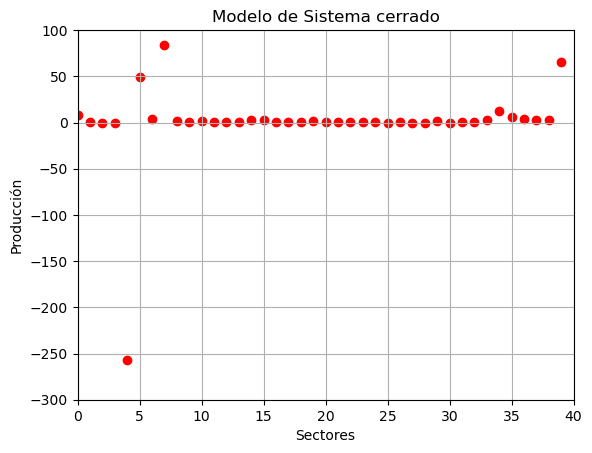

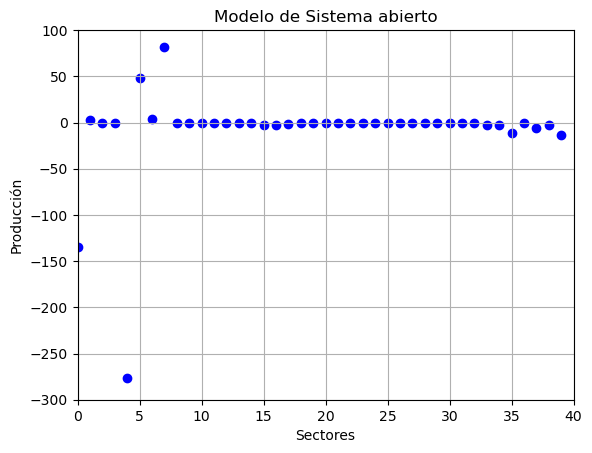

In [85]:
plt.scatter(range(40), delta_pusc,c="red",label="Sistema cerrado")
plt.ylabel("Producción")
plt.xlabel("Sectores")
plt.title("Modelo de Sistema cerrado")
plt.grid()
plt.ylim(-300,100)
plt.xlim(0,40)
plt.show()

plt.scatter(range(40), delta_pu6,c="blue",label="Sistema abierto")
plt.ylabel("Producción")
plt.xlabel("Sectores")
plt.title("Modelo de Sistema abierto")
plt.grid()
plt.ylim(-300,100)
plt.xlim(0,40)
plt.show()

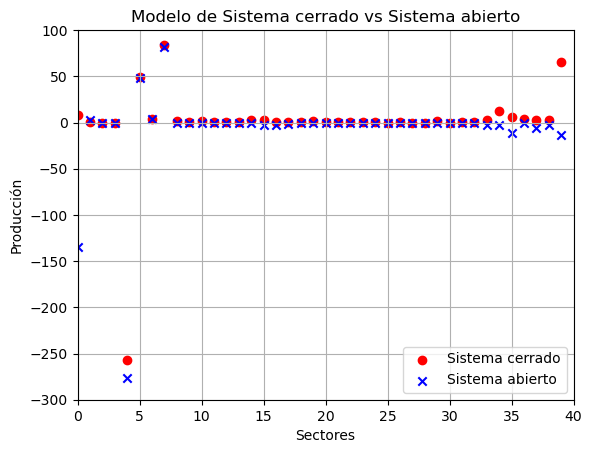

In [86]:
plt.scatter(range(40), delta_pusc,c="red",label="Sistema cerrado")
plt.scatter(range(40), delta_pu6,c="blue",marker="x",label="Sistema abierto")
plt.ylabel("Producción")
plt.xlabel("Sectores")
plt.title("Modelo de Sistema cerrado vs Sistema abierto")
plt.grid()
plt.legend()
plt.ylim(-300,100)
plt.xlim(0,40)
plt.show()

Observando los delta p obtenidos con la ecuación 5 (la que representa sistemas cerrados, es decir, sin tener en cuenta la demanda externa de cada región), y la ecuación 6 (la que representa economías abiertas, es decir, que considera las relaciones inter-regionales), vemos que las diferencias afectan más a los últimos sectores. Esto podría indicarnos que la demanda externa influye mayormente en los sectores mencionados.

También consideramos, que al haber aplicado un shock relativamente pequeño a pocas variables (4 de 40), tiene sentido que p no se altere demasiado.

### Grafico de barras

In [91]:
Dpusc = delta_pusc.reshape(-1)
Dpu6 = delta_pu6.reshape(-1)

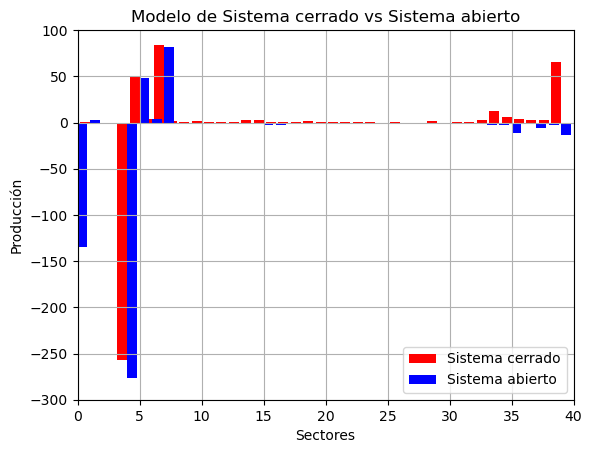

In [93]:
x = np.arange(40)
width = 0.8
#para que no se superpongan las columnas:
x1 = x - width / 2
x2 = x + width / 2
plt.bar(x1, Dpusc, width=width, color="red", label="Sistema cerrado")
plt.bar(x2, Dpu6, width=width, color="blue", label="Sistema abierto")
plt.title("Modelo de Sistema cerrado vs Sistema abierto")
plt.xlabel("Sectores")
plt.ylabel("Producción")
plt.ylim(-300, 100)
plt.xlim(0, 40)
plt.grid()
plt.legend()
plt.show()